<a href="https://colab.research.google.com/github/AndresPautrat/PDI_UPC/blob/main/Reconocimiento_de_numeros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2

img=np.zeros((6,6),np.uint8)

for i in range(len(img)):
  img[i,i:]=255

print(img)

[[255 255 255 255 255 255]
 [  0 255 255 255 255 255]
 [  0   0 255 255 255 255]
 [  0   0   0 255 255 255]
 [  0   0   0   0 255 255]
 [  0   0   0   0   0 255]]


In [ ]:
Gx=cv2.Sobel(img,cv2.CV_32F,1,0)
Gy=cv2.Sobel(img,cv2.CV_32F,0,1)

print(Gx)
print(Gy)

[[   0.  510.    0.    0.    0.    0.]
 [   0.  765.  255.    0.    0.    0.]
 [   0.  765.  765.  255.    0.    0.]
 [   0.  255.  765.  765.  255.    0.]
 [   0.    0.  255.  765.  765.    0.]
 [   0.    0.    0.  510. 1020.    0.]]
[[    0.     0.     0.     0.     0.     0.]
 [-1020.  -765.  -255.     0.     0.     0.]
 [ -510.  -765.  -765.  -255.     0.     0.]
 [    0.  -255.  -765.  -765.  -255.     0.]
 [    0.     0.  -255.  -765.  -765.  -510.]
 [    0.     0.     0.     0.     0.     0.]]


In [ ]:
mag,ang= cv2.cartToPolar(Gx,Gy)

print(mag)
print((180*ang)/np.pi)

[[   0.       510.         0.         0.         0.         0.     ]
 [1020.      1081.8734   360.62445    0.         0.         0.     ]
 [ 510.      1081.8734  1081.8734   360.62445    0.         0.     ]
 [   0.       360.62445 1081.8734  1081.8734   360.62445    0.     ]
 [   0.         0.       360.62445 1081.8734  1081.8734   510.     ]
 [   0.         0.         0.       510.      1020.         0.     ]]
[[  0.        0.        0.        0.        0.        0.     ]
 [270.      315.00955 315.00955   0.        0.        0.     ]
 [270.      315.00955 315.00955 315.00955   0.        0.     ]
 [  0.      315.00955 315.00955 315.00955 315.00955   0.     ]
 [  0.        0.      315.00955 315.00955 315.00955 270.     ]
 [  0.        0.        0.        0.        0.        0.     ]]


In [ ]:
import cv2
import numpy as np
def hog(img,B):
  gx=cv2.Sobel(img,cv2.CV_32F,1,0)
  gy=cv2.Sobel(img, cv2.CV_32F,0,1)
  mag, ang=cv2.cartToPolar(gx,gy)
  bins=np.int32(ang*B/(2*np.pi))
  bin_cells=bins[:10,:10],bins[10:,10:],bins[10:,10:],bins[10:,10:]
  mag_cells=mag[10:,10:], mag[10:,10:],mag[10:,10:],mag[10:,10:]
  hists=[np.bincount(b.ravel(),m.ravel(),B)
            for b,m, in zip(bin_cells,mag_cells)]
  hists=np.hstack(hists)
  return hists
img=cv2.imread('digits.png')


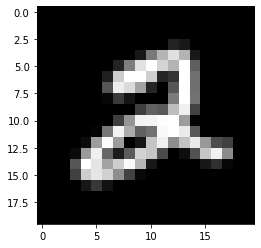

In [ ]:
import matplotlib.pyplot as plt
img1=img[1:20,0:20]
plt.imshow(img1)
plt.show()

(64,)


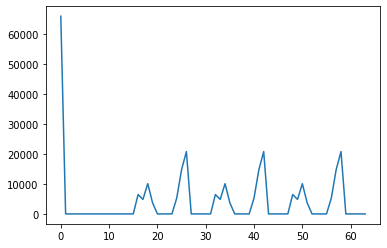

In [ ]:
hists=hog(img1,16)
print(hists.shape)
plt.plot(hists)
plt.show()

In [ ]:
#Contruir data set de entrenamiento
#Parte izquierda digits


all=[]
target=[]


size_Crop=20
size_X=int(img.shape[0]/size_Crop)
size_Y=int(img.shape[1]/size_Crop)
for i in range(int(size_X)):
  for j in range(int (size_Y/2)):
    aux_img=img1=img[i*size_Crop:i*size_Crop+size_Crop,j*size_Crop:j*size_Crop+size_Crop]
    all.append(hog(aux_img,16))


In [ ]:
all=np.vstack(all)

print(all.shape)


(2500, 64)


In [ ]:
train=np.float32(all)


svm=cv2.ml.SVM_create()
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.setType(cv2.ml.SVM_C_SVC)
svm.setC(2.67)
svm.setGamma(5.383)

svm.train(train,cv2.ml.ROW_SAMPLE,target)

TypeError: ignored

In [ ]:
test=np.float32(test)

result=svm.predict(test)[1]

mask=(result==target)
correct=np.count_nonzero(mask)
print(correct*100.0/result.size)